# Genetic Algorithms

The genetic algorithm is a nature-inspired algorithm based on natural selection, that the fittest individuals of a population are selected to reproduce the next generation.

The genetic algorithm consists of 5 processes:
1. Initial population
2. Fitness function
3. Selection
4. Crossing-over
5. Mutation

Terminology:
- Population refers to the set of individuals (solution).
- Individual is defined by its chromsome (set of parameters/variables).
- Fitness function refers to the performance measure of an individual.
- Selection refers to the selection of the fittest.
- Crossing-over refers to a swapping of segments of 2 parents' genes, producing a child individual with a new gene combination.
- Mutation is a random perturbation of genes based on a probability.

Process:
1. Generate the initial population of individuals.
2. Compute fitness of the population.
3. Repeat until convergence:
  1. Select the fittest individuals (parent subpopulation).
  2. Perform crossing-over between parents to produce children.
  3. Perform mutation on the population.
  4. Compute fitness of population.


# Optimization Problem: Linear Regression

To illustrate that evolutionary algorithms can optimise, the simple linear regression problem is used. Define a linear function $y = mx + c + \epsilon$ to be modelled, where $m=1$, $c=0$, $\epsilon\sim N(0,1)$ represents gradient, y-intercept and noise respectively.

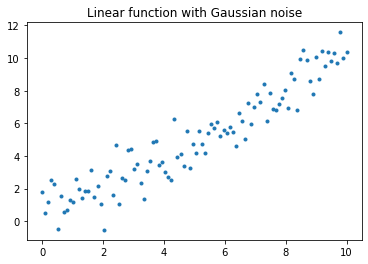

In [1]:
import numpy as np
np.random.seed(0)  # for reproducibility
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 100)
y = X + np.random.normal(0, 1, 100)

plt.title("Linear function with Gaussian noise")
plt.plot(X, y, '.')
plt.show()

# Process 1: Generate the initial population of individuals.

Given that each individual is defined by a set of parameters, we define hyperparameters, which are variables that are not updated at every iteration of optimisation, the population size (number of individuals at any point) and the number of parameters that defines an individual. The initial population can be zero-initialised or random-initialised. For your interest, there also exists many other initialisation methods to be used depending on context, such as the He initialisation and Xavier initialisation.

In [2]:
population_size = 10
num_parameters = 2

# initial_population = np.zeros(shape=(population_size, num_parameters))  # zero initialisation
initial_population = np.random.normal(0, 1, size=(population_size, num_parameters))  # random normal initialisation
initial_population

array([[ 1.8831507 , -1.34775906],
       [-1.270485  ,  0.96939671],
       [-1.17312341,  1.94362119],
       [-0.41361898, -0.74745481],
       [ 1.92294203,  1.48051479],
       [ 1.86755896,  0.90604466],
       [-0.86122569,  1.91006495],
       [-0.26800337,  0.8024564 ],
       [ 0.94725197, -0.15501009],
       [ 0.61407937,  0.92220667]])

# Process 2: Compute the fitness of all individuals.

Another 2 hyperparameters are in the form of functions - the solution and the fitness function. The solution is a model that uses the individual's parameters to compute the output $y$ given input $X$. For simplicity, we use the polynomial regression model (with 2 parameters, it is a linear regression model). The fitness function measures the performance of an individual solution. The evolutionary biology analogy of the fitness function of an organism would include its survivability and reproductive success. We use the negative mean squared error (MSE) for the fitness function. The MSE is negated to reflect a higher value as more desirable.

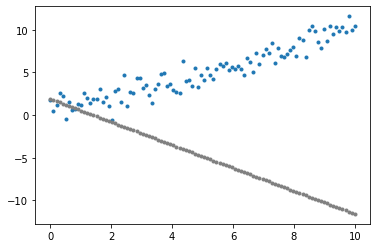

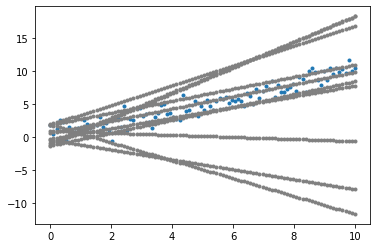

In [3]:
def solution(params):  # Polynomial regression model
  return np.sum([params[i] * X**i for i in range(len(params))], axis=0)

def fitness_function(params):  # Mean squared error
  return -np.sum(abs(y - solution(params))**2) / len(X)

def plot_data():
  plt.plot(X, y, '.')

def plot_individual(individual):
  plt.plot(X, solution(individual), '.', c='grey')

def plot_population(population):
  for individual in population:
    plot_individual(individual)

individual = initial_population[0]
fitness_score = fitness_function(individual)

plot_data()
plot_individual(individual)
plt.show()

plot_data()
plot_population(initial_population)
plt.show()

In [4]:
def compute_fitness(population):
  return np.array([fitness_function(individual) for individual in population])

fitness_scores = compute_fitness(initial_population)
fitness_scores

array([-145.00615079,   -3.20852429,  -21.20939814, -110.93013108,
        -21.41800978,   -2.83355152,  -21.68891802,   -2.97834017,
        -35.66225857,   -1.05527391])

# Process 3: Select the fittest individuals.

Select the top $k$ percentage of individuals with the highest fitness score, where $k$ is a hyperparameter, to form the parent subpopulation.

In [5]:
def get_fittest(population, fitness_scores):
  return population[fitness_scores.argmax(), :]

def select_fittest(population, fitness_scores, k=0.5):
  return population[np.argsort(fitness_scores)[-int(len(population) * k):], :]

parent_subpopulation = select_fittest(initial_population, fitness_scores, k=0.2)
parent_subpopulation, compute_fitness(parent_subpopulation)

(array([[1.86755896, 0.90604466],
        [0.61407937, 0.92220667]]), array([-2.83355152, -1.05527391]))

# Process 4: Perform crossing-over between parents to produce children.

Crossing-over is a biological process that exchanges genetic material to result in new combinations of genetic material. For the benefit of non-biology students, much detail has been abstracted out, so for your interest, refer to chromosomal crossovers. Crossing over is performed in the genetic algorithm by swapping a segment parameters of one parent with another parent. For example, take 2 parents defined by 4 parameters: P1 = [A1, A2, A3, A4], P2 = [B1, B2, B3, B4]. A crossing-over at the 3rd index will result in a child C = [A1, A2, B3, B4]. There exists other methods of genetic exchange to introduce randomness, such as swapping elements instead of segments.

In [6]:
def perform_crossingover(subpopulation):
  children = []
  for i in range(population_size - len(subpopulation)):
    parents = subpopulation[np.random.randint(0, len(subpopulation), 2)]
    gene_indices = np.zeros(num_parameters).astype(int)
    gene_indices[np.random.randint(len(gene_indices)+1):] = 1  # segment swap
    child = parents[gene_indices, np.arange(num_parameters)]
    children.append(child)
  return np.append(subpopulation, np.array(children), axis=0)

next_population = perform_crossingover(parent_subpopulation)
next_population, compute_fitness(next_population)

(array([[1.86755896, 0.90604466],
        [0.61407937, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.90604466],
        [0.61407937, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.92220667],
        [0.61407937, 0.92220667]]),
 array([-2.83355152, -1.05527391, -1.05527391, -2.83355152, -1.05527391,
        -1.05527391, -3.04089715, -1.05527391, -3.04089715, -1.05527391]))

# Process 5: Perform mutation on the population.

A mutation is defined as a change in a DNA sequence. While we do not hold the exact differences between DNA, gene and chromosome in our genetic algorithm, we draw inspiration from mutation in biology that usually worsens fitness but can occasionally improve fitness. To perform mutation on the population parameters, add Gaussian noise $\epsilon\sim N(0, \sigma)$, where $\sigma$ is the standard deviation hyperparameter.

In [7]:
def perform_mutation(population, sigma=0.1):
  return population + np.random.normal(0, sigma, population.shape)  # Gaussian noise

mutated_population = perform_mutation(next_population, sigma=0.01)
mutated_population, compute_fitness(mutated_population)

(array([[1.86732417, 0.90693888],
        [0.6081361 , 0.9211497 ],
        [0.62150733, 0.91465686],
        [1.86617613, 0.88479546],
        [0.60377918, 0.91703215],
        [0.61266137, 0.90944187],
        [1.88237409, 0.93879944],
        [0.61408077, 0.93726506],
        [1.86860417, 0.91984624],
        [0.62227372, 0.92623524]]),
 array([-2.84393595, -1.0525611 , -1.05282308, -2.58416917, -1.04907953,
        -1.04977737, -3.3166936 , -1.07545786, -3.01246558, -1.0622913 ]))

# The Genetic Algorithm: All 5 Processes Together

Having understood and implemented the 5 processes of the genetic algorithm, let's put them all together. We first define the hyperparameters as previously discussed.

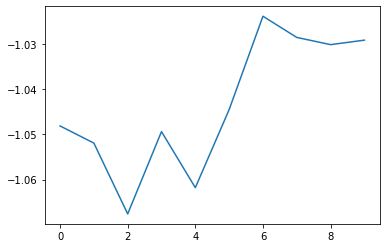

In [8]:
# Define hyperparameters of the genetic algorithm.
population_size = 50
num_parameters = 2
num_generations = 10
top_k = 0.5
mutation_sigma = 0.01

# Process 1: Generate the initial population of individuals.
population = np.random.uniform(0, 1, size=(population_size, num_parameters))

# Process 2: Compute the fitness of all individuals.
fitness_scores = compute_fitness(population)

# Misc: Experimental tracking
scores = []
solutions = []

# Iterate the process over multiple generations of populations.
for i in range(num_generations):
  # Process 3: Select the fittest individuals.
  fittest_subpopulation = select_fittest(population, fitness_scores, k=top_k)
  fitness_scores = compute_fitness(fittest_subpopulation)

  # Misc: Experimental tracking
  solutions.append(solution(get_fittest(population, fitness_scores)))
  scores.append(max(fitness_scores))

  # Process 4: Perform crossing-over between parents to produce children.
  children = perform_crossingover(fittest_subpopulation)

  # Process 5: Perform mutation on the population.
  population = perform_mutation(children, sigma=mutation_sigma)


# Misc: Experimental tracking
plt.plot(np.arange(num_generations), scores)
plt.show()

# Experiment Result

Looking at the fittest individual in the final population, it looks like a reasonable well-fit linear regression model. The rest of the population are worse but not too bad as well.

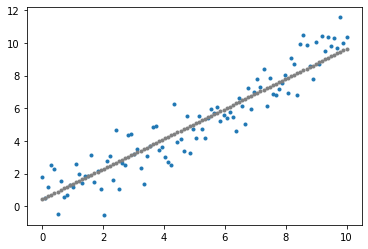

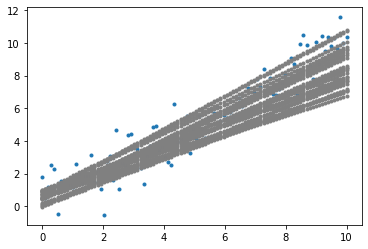

In [9]:
individual = get_fittest(fittest_subpopulation, fitness_scores)

fitness_score = fitness_function(individual)
y_pred = solution(individual)

plot_data()
plot_individual(individual)
plt.show()

plot_data()
plot_population(fittest_subpopulation)
plt.show()

To conclude the tutorial, let's visualise the optimisation process. Notice that virtually instantly, the linear regression model fits to the curve. In fact, linear regression is too simple a problem to realise the effectiveness of the genetic algorithm. Nonetheless, the reason for using linear regression is to bring focus to the genetic algorithm without the overhead of needing to understand the model.

In [10]:
%%capture
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
# rc('animation', html='html5')

plot_data()
ga_line = ax.plot([], [])[0]
ax.set_xlim(min(X), max(X))
ax.set_ylim(min(y), max(y))

def animate(i):
  ga_line.set_data(X, solutions[i])
  ax.set_xlabel(f'Gen {i+1}')
  return ga_line, ax

ani = FuncAnimation(fig, animate, frames=np.arange(0, num_generations), interval=80, repeat=False)

In [11]:
from IPython import display as ipythondisplay
from IPython.display import HTML

HTML(ani.to_jshtml())